# 套件

In [7]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 參數(建議學員可以根據需求自行調整看看)

In [8]:
from datetime import datetime
y_symbol = "^TWII" # 股票代碼 ^TWII 台灣加權指數 美股蘋果 AAPL 台股台積電 2330.TW
startdate = datetime(2015,1,1) # 訓練起始日期
enddate = datetime(2025,4,15) # 訓練結束日期
漲幅  = 1.03 # 漲3%出場
跌幅 = 0.97 # 跌3%出場
持有時間 = 20 #預期要持有多長時間

# 載入資料

https://sharegpt.com/c/nwqFGKt

In [9]:
import yfinance as yf
from datetime import datetime, timedelta

df = yf.download(y_symbol, start = startdate,end = enddate)

display(df)


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII
Date,,,,,
2015-01-05,9274.068359,9292.267496,9181.977956,9292.267496,2311000
2015-01-06,9048.298828,9209.887939,9043.399436,9209.887939,2725800
2015-01-07,9080.047852,9108.618032,9050.498184,9051.898568,2384100
2015-01-08,9237.988281,9246.578086,9153.988663,9153.988663,2657600
2015-01-09,9215.538086,9284.528006,9215.538086,9247.358253,2398800
...,...,...,...,...,...
2025-04-08,18459.949219,19064.470703,18180.480469,19064.470703,5839900
2025-04-09,17391.759766,18371.519531,17306.970703,18337.439453,6177900


# Label triple_barrier

https://sharegpt.com/c/Eir89kz

提示詞:
我想請你幫忙做程式碼補全 
#字元後面的描述代表我想做的事情 
<you codeing here>代表請你輸入代碼,
我會貼給你半完成的程式碼 
請你幫我補全程式碼,
我的第一個程式碼如下: 
def triple_barrier_signal(price,ub,lb,t): 
''' triple-barrier包含2個horizontal barrier，1個vertical barrier。 
首先解釋一下這3个barrier： 根據3個barrier中第一個被touch的進行label barrier 1 
(the upper barrier)首先達到，label 1 barrier 2（the lower barrier)首先達到，
label -1 如果barrier 1和barrier 2都没有達到，
则barrier 3達到，label 0 ''' 
signal = [] for i in range(len(price)-t): 
# 情況1.如果price[i:i+t+1]這段序列有任何元素的值大於price[i]*ub則signal[i] = 1 
<you codeing here> 
# 情況2.如果price[i:i+t+1]這段序列有任何元素的值低於price[i]*lb則signal[i] = -1 
<you codeing here> 
# 如果以上情況1和情況2都沒有發生則signal[i] = 0 
<you codeing here> 
return signal



In [10]:
import numpy as np
import math
def triple_barrier_signal(price,ub,lb,t):
  '''
  triple-barrier包含2個horizontal barrier，1個vertical barrier。
  首先解釋一下這3个barrier：
  根據3个barrier中第一個被touch的進行label
  barrier 1 (the upper barrier)首先達到，label 1
  barrier 2（the lower barrier)首先達到，label -1
  如果barrier 1和barrier 2都没有達到，则barrier 3達到，label 0
  '''
  signal = []
  for i in range(len(price)-t):
    # 情況1.如果price[i:i+t+1]這段序列有任何元素的值大於price[i]*ub則signal[i] = 1
    if max(price[i:i+t+1]) > price[i] * ub:
      signal.append(1)
    # 情況2.如果price[i:i+t+1]這段序列有任何元素的值低於price[i]*lb則signal[i] = -1
    elif min(price[i:i+t+1]) < price[i] * lb:
      signal.append(-1)
    # 如果以上情況1和情況2都沒有發生則signal[i] = 0
    else:
      signal.append(0)
  return signal

from itertools import chain
ret = triple_barrier_signal(list(chain.from_iterable(df.Close.values.tolist())),漲幅,跌幅,持有時間)
df = df.head(len(ret))
df['triple_barrier_signal'] = ret

# check 'triple_barrier_signal'

In [11]:
df.tail(20)

Price,Close,High,Low,Open,Volume,triple_barrier_signal
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,
Date,,,,,,
2025-02-13,23399.410156,23413.099609,23206.449219,23263.279297,3604700,-1
2025-02-14,23152.609375,23276.240234,23142.949219,23198.390625,3818900,-1
2025-02-17,23505.330078,23510.679688,23242.839844,23258.169922,3408200,-1
2025-02-18,23666.109375,23666.109375,23454.089844,23550.500000,3038600,-1
2025-02-19,23604.080078,23683.460938,23550.990234,23589.439453,3534600,-1
2025-02-20,23487.460938,23576.710938,23400.750000,23530.970703,3563200,-1
2025-02-21,23730.250000,23732.580078,23488.419922,23526.130859,3518400,-1
2025-02-24,23565.310547,23605.220703,23461.429688,23573.800781,3211200,-1


In [12]:
import seaborn as sns
print(df['triple_barrier_signal'].value_counts())
#sns.countplot(df['triple_barrier_signal'])

triple_barrier_signal
 1    1079
-1     772
 0     622
Name: count, dtype: int64


# plot buy price and sell price

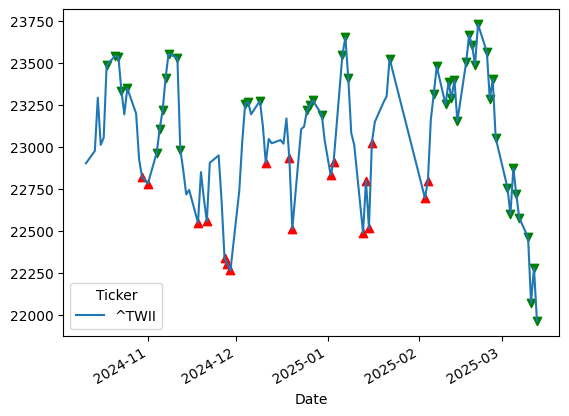

In [13]:
import matplotlib.pyplot as plt

df_recent = df.tail(100)
buy = df_recent[df_recent['triple_barrier_signal']==1]['Close']
sell = df_recent[df_recent['triple_barrier_signal']==-1]['Close']
df_recent['Close'].plot()
plt.scatter(buy.index,buy.values,color='red',marker='^')
plt.scatter(sell.index,sell.values,color='green',marker='v')
plt.show()

# 建立ohlcv

In [14]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

https://sharegpt.com/c/lXPO7as

count    2472.000000
mean       54.007853
std        12.568273
min         0.000000
25%        45.661722
50%        54.917273
75%        62.828096
max        84.230153
Name: RSI, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\80940770.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RSI'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,
Date,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914


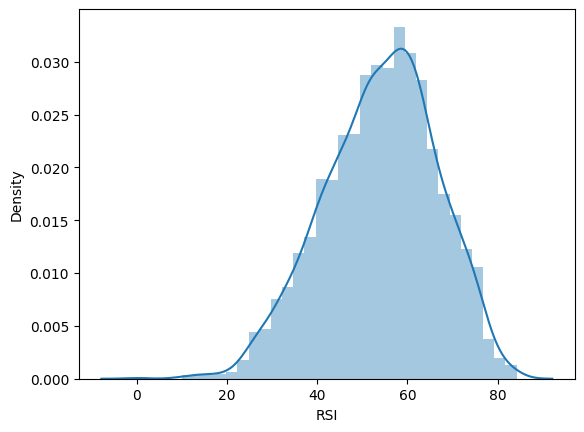

In [15]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    2460.000000
mean      -39.836852
std        31.474178
min      -100.000000
25%       -67.598045
50%       -32.475712
75%       -11.542162
max        -0.000000
Name: Williams %R, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\4271450618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Williams %R'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,
Date,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529


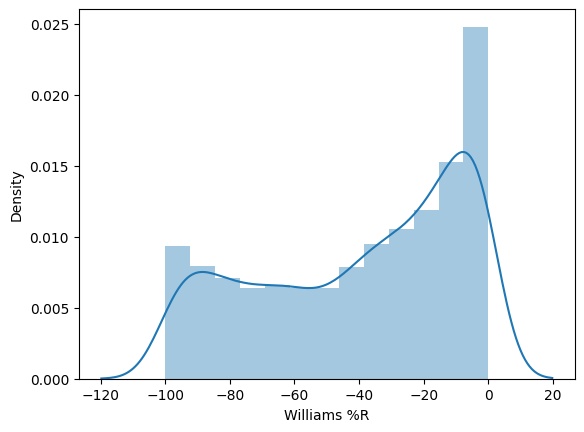

In [16]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count     2433.000000
mean     13294.610461
std       4162.658699
min       8044.833020
25%       9958.061714
50%      11250.122690
75%      16717.165563
max      23217.595227
Name: SMA, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\1878676325.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SMA'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,
Date,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668


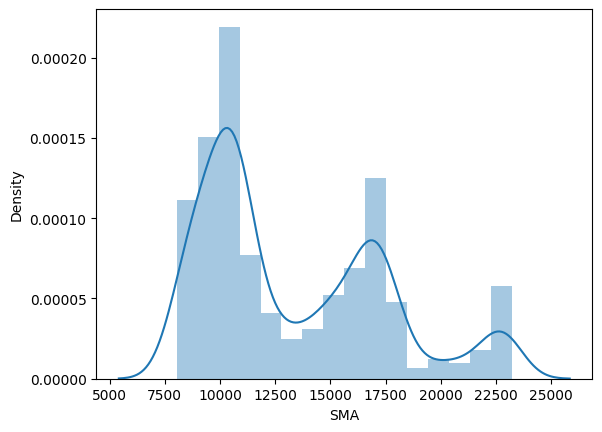

In [17]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count     2473.000000
mean     13319.350919
std       4233.691914
min       7786.421896
25%       9852.657085
50%      11349.602689
75%      16646.759104
max      23822.811210
Name: EMA, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\3115164127.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EMA'])


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,
Date,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073


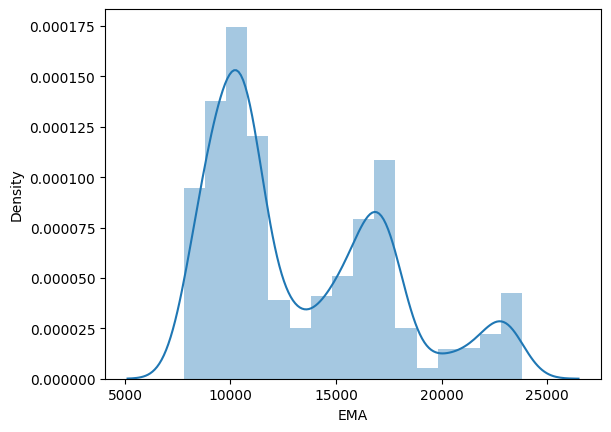

In [18]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count     2465.000000
mean     13340.213397
std       4241.353816
min       7753.099240
25%       9877.647483
50%      11401.528190
75%      16641.671050
max      23970.548655
Name: WMA, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\1037319935.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WMA'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,
Date,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370


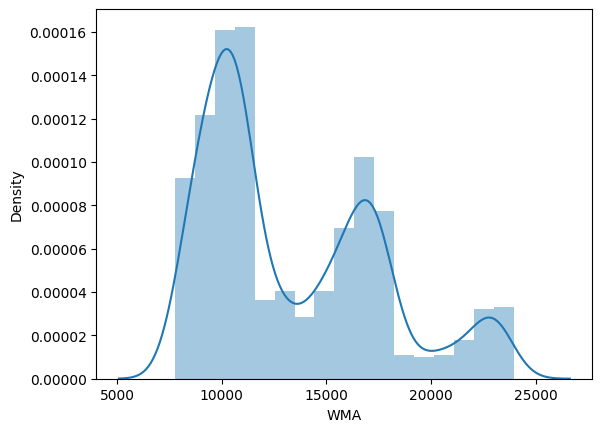

In [19]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count     2455.000000
mean     13367.947537
std       4255.056059
min       7586.372645
25%       9923.449299
50%      11481.681941
75%      16686.825164
max      24251.328573
Name: HMA, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\1554131951.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HMA'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,
Date,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506


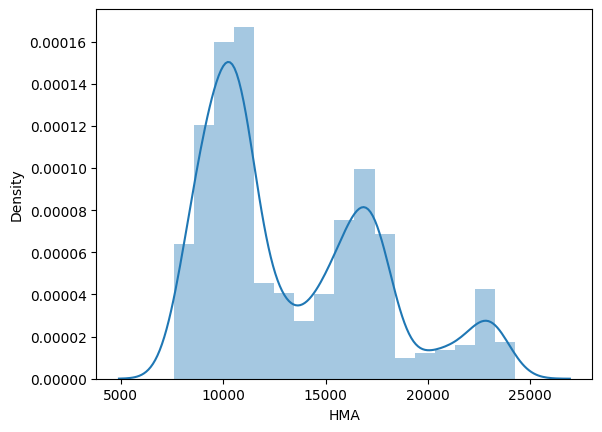

In [20]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count     2473.000000
mean     13341.020474
std       4253.849414
min       7579.969193
25%       9882.003218
50%      11376.924938
75%      16681.351786
max      24254.656706
Name: TEMA, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\348095914.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TEMA'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,
Date,,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747,22548.968200
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934,22438.656985
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147,22191.140944
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649,22148.320071
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506,21981.665622


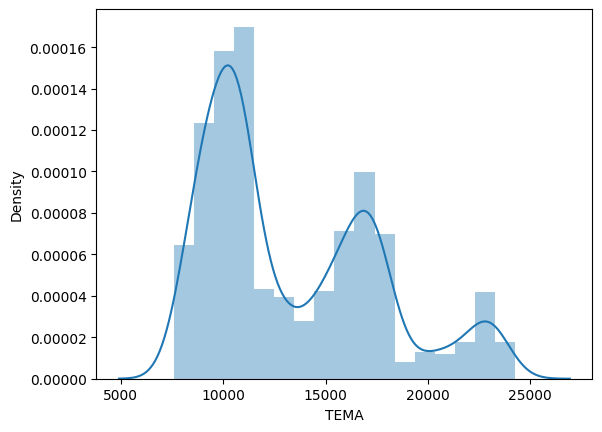

In [21]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    2472.000000
mean       23.052242
std       111.430297
min      -342.035040
25%       -60.038321
50%        46.002974
75%       103.697472
max       347.439744
Name: CCI, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\4109371288.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CCI'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,
Date,,,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747,22548.968200,-151.428308
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934,22438.656985,-148.629962
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147,22191.140944,-197.395138
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649,22148.320071,-125.333154
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506,21981.665622,-123.426813


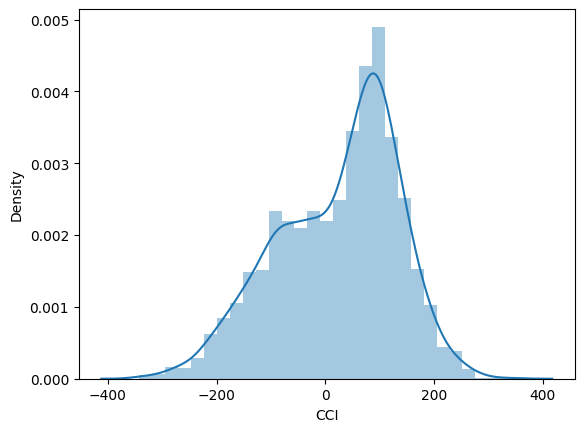

In [22]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    2472.000000
mean        8.530461
std        29.520341
min      -100.000000
25%       -11.491195
50%        10.818606
75%        30.032221
max        76.380951
Name: CMO, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\2048488867.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CMO'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,
Date,,,,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747,22548.968200,-151.428308,-26.979067
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934,22438.656985,-148.629962,-31.296676
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147,22191.140944,-197.395138,-43.595839
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649,22148.320071,-125.333154,-29.805230
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506,21981.665622,-123.426813,-39.645236


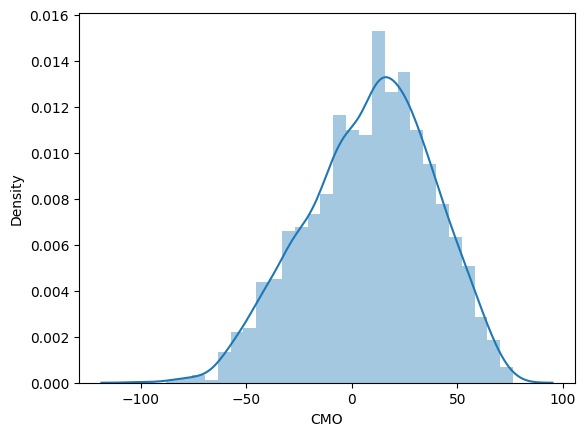

In [23]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    2473.000000
mean       -0.231931
std        50.785523
min      -346.978047
25%       -23.610351
50%         0.441398
75%        26.726250
max       214.802204
Name: MACD, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\2662787808.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MACD'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747,22548.968200,-151.428308,-26.979067,-105.726526
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934,22438.656985,-148.629962,-31.296676,-111.055879
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147,22191.140944,-197.395138,-43.595839,-132.928926
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649,22148.320071,-125.333154,-29.805230,-125.729070
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506,21981.665622,-123.426813,-39.645236,-133.834965


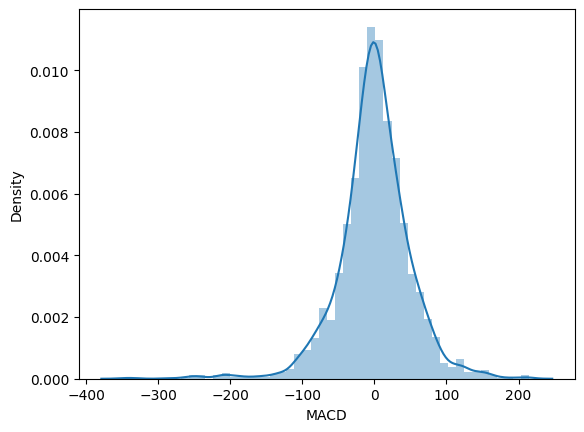

In [24]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    2473.000000
mean       -0.001013
std         0.359703
min        -2.355901
25%        -0.202042
50%         0.000000
75%         0.207823
max         1.592874
Name: PPO, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\3095035729.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PPO'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747,22548.968200,-151.428308,-26.979067,-105.726526,-0.456678
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934,22438.656985,-148.629962,-31.296676,-111.055879,-0.481027
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147,22191.140944,-197.395138,-43.595839,-132.928926,-0.578311
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649,22148.320071,-125.333154,-29.805230,-125.729070,-0.548855
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506,21981.665622,-123.426813,-39.645236,-133.834965,-0.587107


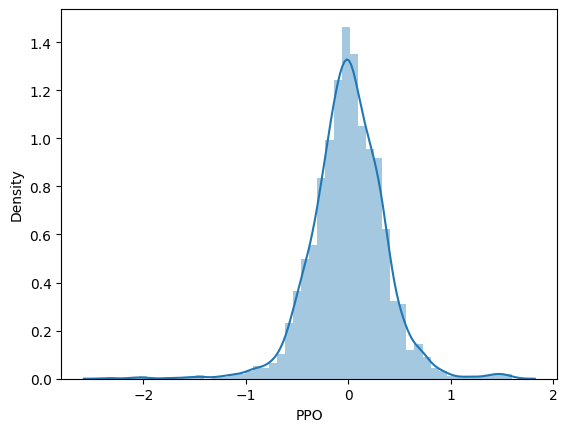

In [25]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    2461.000000
mean        0.508691
std         3.635597
min       -23.361982
25%        -1.438697
50%         0.814653
75%         2.814184
max        16.773101
Name: ROC, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\1860037326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ROC'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747,22548.968200,-151.428308,-26.979067,-105.726526,-0.456678,-4.605907
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934,22438.656985,-148.629962,-31.296676,-111.055879,-0.481027,-4.850558
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147,22191.140944,-197.395138,-43.595839,-132.928926,-0.578311,-6.030329
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649,22148.320071,-125.333154,-29.805230,-125.729070,-0.548855,-6.118312
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506,21981.665622,-123.426813,-39.645236,-133.834965,-0.587107,-6.805049


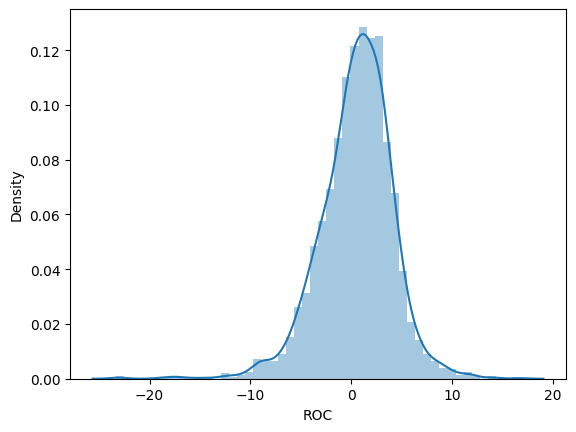

In [26]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    2.464000e+03
mean     4.549832e+09
std      7.433594e+09
min     -8.254754e+09
25%     -2.569138e+08
50%      1.673976e+09
75%      7.297266e+09
max      3.176329e+10
Name: CFI, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\3380674280.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CFI'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747,22548.968200,-151.428308,-26.979067,-105.726526,-0.456678,-4.605907,1.798585e+10
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934,22438.656985,-148.629962,-31.296676,-111.055879,-0.481027,-4.850558,1.767168e+10
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147,22191.140944,-197.395138,-43.595839,-132.928926,-0.578311,-6.030329,1.716029e+10
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649,22148.320071,-125.333154,-29.805230,-125.729070,-0.548855,-6.118312,1.686096e+10
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506,21981.665622,-123.426813,-39.645236,-133.834965,-0.587107,-6.805049,1.640495e+10


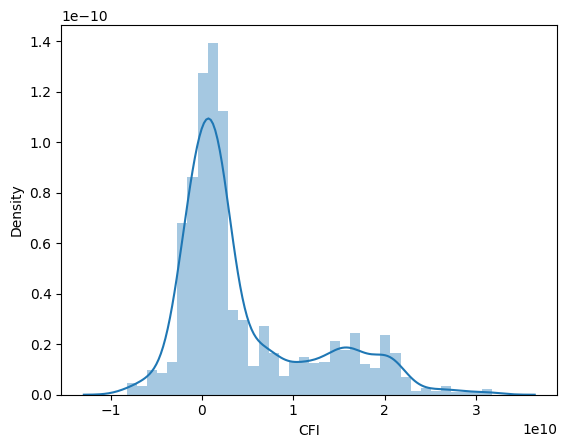

In [27]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    2460.000000
mean        1.138076
std        17.722597
min       -73.465234
25%       -10.238624
50%         1.708414
75%        12.891411
max        76.234934
Name: DMI, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\3167327712.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DMI'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747,22548.968200,-151.428308,-26.979067,-105.726526,-0.456678,-4.605907,1.798585e+10,-15.695033
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934,22438.656985,-148.629962,-31.296676,-111.055879,-0.481027,-4.850558,1.767168e+10,-17.919297
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147,22191.140944,-197.395138,-43.595839,-132.928926,-0.578311,-6.030329,1.716029e+10,-30.822253
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649,22148.320071,-125.333154,-29.805230,-125.729070,-0.548855,-6.118312,1.686096e+10,-23.262897
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506,21981.665622,-123.426813,-39.645236,-133.834965,-0.587107,-6.805049,1.640495e+10,-25.384094


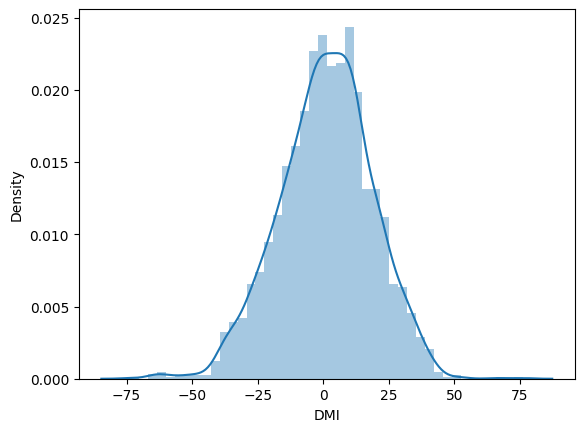

In [28]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

c:\Users\ricky\Desktop\cnn_stock_web_v12\stockenv\Lib\site-packages\finta\finta.py:828: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sig0, xpt0, af0 = True, high[0], af
c:\Users\ricky\Desktop\cnn_stock_web_v12\stockenv\Lib\site-packages\finta\finta.py:829: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  _sar = [low[0] - (high - low).std()]
c:\Users\ricky\Desktop\cnn_stock_web_v12\stockenv\Lib\site-packages\finta\finta.py:834: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a va

count     2473.000000
mean     13274.920616
std       4230.552717
min       7203.036601
25%       9888.294820
50%      11262.903281
75%      16633.513090
max      24416.669922
Name: SAR, dtype: float64


C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\1481618610.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SAR'].dropna())


Price,Close,High,Low,Open,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Ticker,^TWII,^TWII,^TWII,^TWII,^TWII,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-07,22576.070312,22747.109375,22542.080078,22696.230469,2987500,-1,40.115657,-84.227408,23157.814787,22913.718592,...,22635.398747,22548.968200,-151.428308,-26.979067,-105.726526,-0.456678,-4.605907,1.798585e+10,-15.695033,23462.698994
2025-03-10,22459.150391,22641.250000,22407.570312,22548.980469,3078100,-1,38.461910,-92.742565,23139.984327,22822.804952,...,22517.938934,22438.656985,-148.629962,-31.296676,-111.055879,-0.481027,-4.850558,1.767168e+10,-17.919297,23396.507055
2025-03-11,22071.089844,22140.390625,21769.570312,22126.060547,3604700,-1,33.522381,-84.639937,23116.471894,22672.461930,...,22368.016147,22191.140944,-197.395138,-43.595839,-132.928926,-0.578311,-6.030329,1.716029e+10,-30.822253,23334.286631
2025-03-12,22278.359375,22391.470703,22153.609375,22171.099609,3159800,-1,38.095354,-74.081175,23102.966987,22593.641419,...,22248.143649,22148.320071,-125.333154,-29.805230,-125.729070,-0.548855,-6.118312,1.686096e+10,-23.262897,23209.109326
2025-03-13,21961.679688,22552.429688,21961.679688,22403.339844,3666300,-1,34.221914,-90.213529,23079.878668,22467.249073,...,22124.198506,21981.665622,-123.426813,-39.645236,-133.834965,-0.587107,-6.805049,1.640495e+10,-25.384094,23093.946205


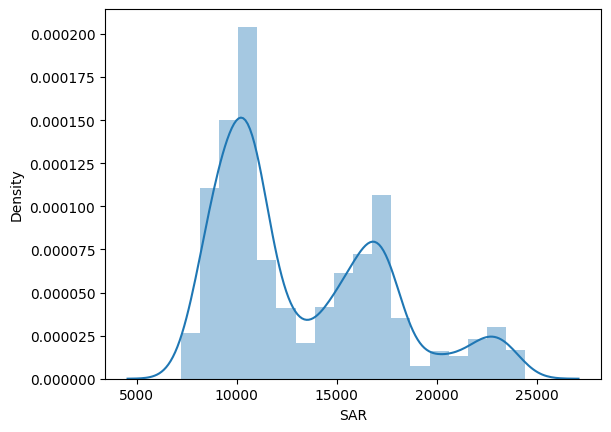

In [29]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# 定義features(X) label(y)

# MACD RSI講一下

In [30]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = ['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR']
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(2473, 21)
(2433, 16)


Price,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Ticker,,,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2025-03-07,40.115657,-84.227408,23157.814787,22913.718592,22820.689583,22635.398747,22548.968200,-151.428308,-26.979067,-105.726526,-0.456678,-4.605907,1.798585e+10,-15.695033,23462.698994,-1
2025-03-10,38.461910,-92.742565,23139.984327,22822.804952,22716.446484,22517.938934,22438.656985,-148.629962,-31.296676,-111.055879,-0.481027,-4.850558,1.767168e+10,-17.919297,23396.507055,-1
2025-03-11,33.522381,-84.639937,23116.471894,22672.461930,22559.172613,22368.016147,22191.140944,-197.395138,-43.595839,-132.928926,-0.578311,-6.030329,1.716029e+10,-30.822253,23334.286631,-1
2025-03-12,38.095354,-74.081175,23102.966987,22593.641419,22470.344444,22248.143649,22148.320071,-125.333154,-29.805230,-125.729070,-0.548855,-6.118312,1.686096e+10,-23.262897,23209.109326,-1
2025-03-13,34.221914,-90.213529,23079.878668,22467.249073,22343.162370,22124.198506,21981.665622,-123.426813,-39.645236,-133.834965,-0.587107,-6.805049,1.640495e+10,-25.384094,23093.946205,-1


# features scaling(特徵縮放)

In [31]:
from sklearn.preprocessing import MinMaxScaler
import pickle
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = min_max_scaler.fit_transform(df_minmax[features])#縮放到0-1之間
with open('scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)
df_minmax.tail()

Price,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Ticker,,,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2025-03-07,0.406123,0.157726,0.996060,0.943311,0.929097,0.903034,0.897708,0.276452,0.365286,0.429441,0.480965,0.467324,0.655719,0.479831,0.944581,-1
2025-03-10,0.383860,0.072574,0.994885,0.937641,0.922670,0.895986,0.891092,0.280511,0.338773,0.419955,0.474799,0.461228,0.647868,0.461357,0.940735,-1
2025-03-11,0.317364,0.153601,0.993335,0.928266,0.912972,0.886990,0.876249,0.209783,0.263246,0.381019,0.450162,0.431833,0.635090,0.354187,0.937121,-1
2025-03-12,0.378926,0.259188,0.992445,0.923351,0.907494,0.879797,0.873681,0.314300,0.347931,0.393835,0.457622,0.429641,0.627610,0.416974,0.929849,-1
2025-03-13,0.326781,0.097865,0.990923,0.915470,0.899652,0.872359,0.863686,0.317065,0.287506,0.379407,0.447935,0.412530,0.616215,0.399355,0.923158,-1


In [32]:
df.tail(3)[['RSI','Williams %R','SMA']]

Price,RSI,Williams %R,SMA
Ticker,,,
Date,,,
2025-03-11,33.522381,-84.639937,23116.471894
2025-03-12,38.095354,-74.081175,23102.966987
2025-03-13,34.221914,-90.213529,23079.878668


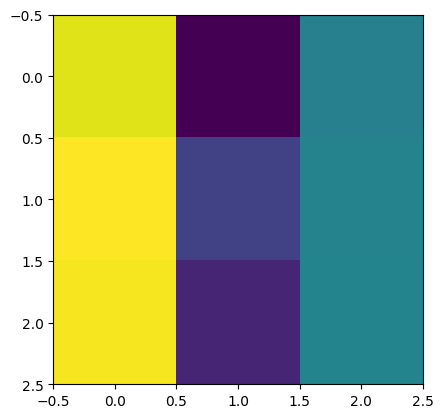

In [33]:
img = df.head(3)[['RSI','Williams %R','MACD']].values
plt.imshow(img)

In [34]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# 定義X,y pair

https://sharegpt.com/c/KcXGMUL

In [36]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:若i為0,則i+days為15因此數據index為0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:若i為0days為15則[i+days-1:i+days]為[14:15]相當於index[14]之y_name('triple_barrier_signal')
  X = np.array(X) # 轉成np_array
  Xs.append(X) #加入至list
  ys.append(y) #加入至list
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

C:\Users\ricky\AppData\Local\Temp\ipykernel_6728\1448198490.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features = df.drop(y_name,axis=1).columns.tolist()
100%|██████████| 2419/2419 [00:20<00:00, 120.70it/s]

準備完成


# check 資料總數跟 資料時間範圍

In [37]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 2419
第一筆的index開始和結束:2015-03-11-2015-03-31
最後一筆的index開始和結束:2025-02-20-2025-03-13


# Reshape X (圖片數量,長,寬,1張)

In [38]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2419, 15, 15)
(2419, 15, 15, 1)


# One hot encoding of label(獨熱編碼)

原始y代表漲幅

In [39]:
print('One hot encoding前')
print(ys.shape)
print(ys[:5])
from keras.utils import to_categorical

ys = to_categorical(ys, num_classes = 3)
print('One hot encoding後')
print(ys.shape)
print(ys[:5])

One hot encoding前
(2419, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]
One hot encoding後
(2419, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# Visualization

https://sharegpt.com/c/lQ0OLk6

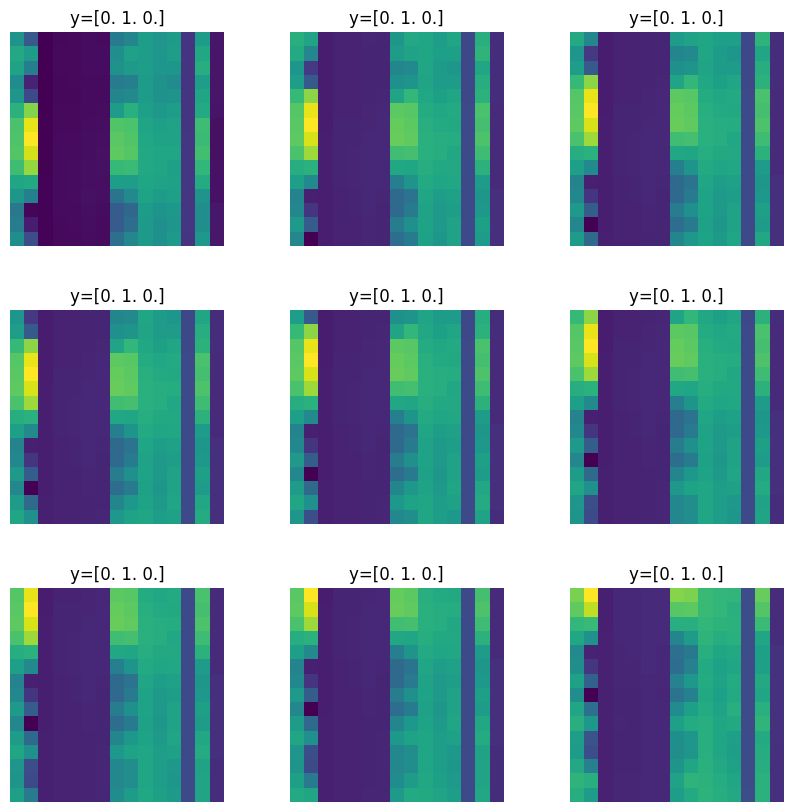

In [40]:
import matplotlib.pyplot as plt

# n为batch大小，这里设为9
n = 9

# 生成一个九宫格的画布
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# 遍历batch中的每一个样本，依次画出对应的矩阵和标注
for i in range(n):
    # 获取当前样本的矩阵和标注
    x = Xs[i]
    y = ys[i]
    
    # 在对应的子图上画出矩阵和标注
    axs[i//3, i%3].imshow(x)
    axs[i//3, i%3].set_title('y={}'.format(y))
    axs[i//3, i%3].axis('off')

# 调整子图之间的距离
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 显示画布
plt.show()


# Split training and test sets

In [41]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(2379, 15, 15, 1) (2379, 3) (40, 15, 15, 1)


# 調整採樣

https://sharegpt.com/c/Vm1VcLs

In [43]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(2379, 225)
(2379,)
0
0    582
1    582
2    582
Name: count, dtype: int64
(1746, 15, 15, 1)
(1746, 3)


# Split training and val sets

https://sharegpt.com/c/ZgCDypE

In [44]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(1396, 15, 15, 1) (1396, 3) (350, 15, 15, 1) (350, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [45]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    1059
2     772
0     588
Name: count, dtype: int64

In [46]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    582
1    582
2    582
Name: count, dtype: int64

In [47]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

2    466
1    465
0    465
Name: count, dtype: int64

In [48]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

1    117
0    117
2    116
Name: count, dtype: int64

# 用chatgpt幫忙製作模型

https://sharegpt.com/c/M7VugUR

In [49]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout


# 創建一個序列模型
model = Sequential()

# 添加第一個卷積層，使用32個3x3的卷積核，使用ReLU激活函數，並指定輸入形狀
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)))

# 添加第二個卷積層，使用64個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(64, (3, 3), activation='relu'))

# 添加第三個卷積層，使用128個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(128, (3, 3), activation='relu'))

# 添加平坦層，將卷積層的輸出展開為一維數組
model.add(Flatten())

# 添加dropout層，防止過度擬合
model.add(Dropout(0.5))

# 添加全連接層，使用softmax激活函數，輸出3個類別
model.add(Dense(3, activation='softmax'))

# 編譯模型，使用交叉熵損失函數和Adam優化器
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 打印模型結構
model.summary()

c:\Users\ricky\Desktop\cnn_stock_web_v12\stockenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 13, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        31,107 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,779 (483.51 KB)

 Trainable params: 123,779 (483.51 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
'''
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()
'''

"\nnclasses = 3 \nmodel = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32\nmodel.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64\nmodel.add(MaxPool2D(pool_size=(5,5)))# 3,3,64\nmodel.add(Flatten())#576\nmodel.add(Dropout(0.5))#288\nmodel.add(Dense(128, activation='relu'))#128\nmodel.add(Dropout(0.5))#64\nmodel.add(Dense(32, activation='relu'))#32\nmodel.add(Dropout(0.5))#16\nmodel.add(Dense(nclasses, activation='softmax'))#3\nmodel.summary()\n"

# 編譯模型

In [51]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 定義訓練過程的早停法機制

In [52]:
es = EarlyStopping(monitor='val_accuracy',#驗證集acc
                   min_delta=0.0001, 
                   patience=20,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [53]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 200,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.3378 - loss: 1.0991 - val_accuracy: 0.3371 - val_loss: 1.0962
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.3296 - loss: 1.1012 - val_accuracy: 0.3914 - val_loss: 1.0813
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4145 - loss: 1.0820 - val_accuracy: 0.3829 - val_loss: 1.0837
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.4137 - loss: 1.0810 - val_accuracy: 0.3914 - val_loss: 1.0621
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.4296 - loss: 1.0585 - val_accuracy: 0.4086 - val_loss: 1.0531
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.4357 - loss: 1.0475 - val_accuracy: 0.4114 - val_loss: 1.0517
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.4470 - loss: 1.0423 - val_accuracy: 0.4114 - val_loss: 1.0413
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.4575 - loss: 1.0331 - val_accura

# chatgpt協助做訓練過程評估

https://sharegpt.com/c/1CqBYQz

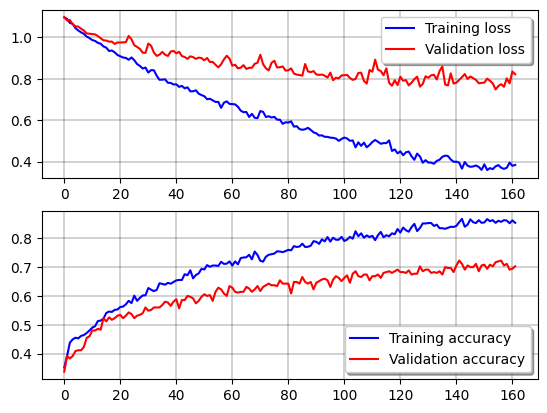

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# chatgpt協助做混淆矩陣

https://sharegpt.com/c/0SZ8tM0

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


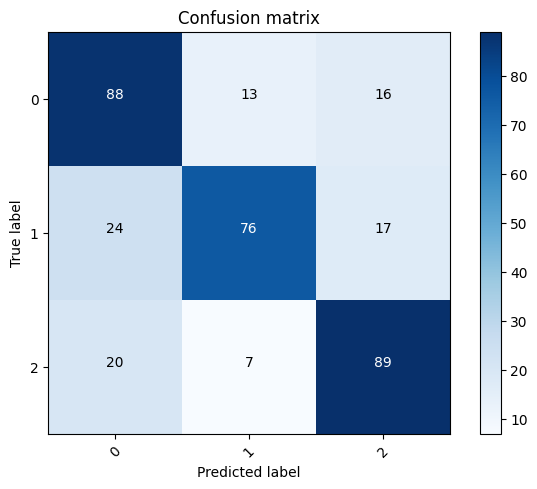

In [55]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
nclasses = 3
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# classification_report 

In [56]:
from sklearn.metrics import classification_report 
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
              precision    recall  f1-score   support

        Hold       0.67      0.75      0.71       117
         BUY       0.79      0.65      0.71       117
        SELL       0.73      0.77      0.75       116

   micro avg       0.72      0.72      0.72       350
   macro avg       0.73      0.72      0.72       350
weighted avg       0.73      0.72      0.72       350
 samples avg       0.72      0.72      0.72       350



# 驗證集的準確度

In [57]:
def val_acc(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
val_acc(yval,y_pred)

np.float64(0.7228571428571429)

## 測試集預測

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


[*********************100%***********************]  1 of 1 completed

40


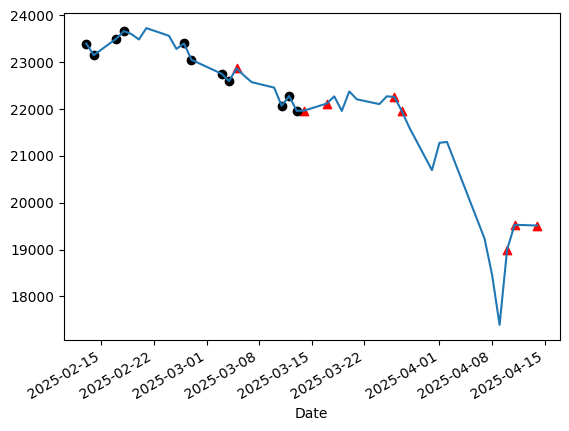

In [58]:
import pandas as pd
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))
C = pd.DataFrame()
C['Close'] = yf.download(y_symbol, start = startdate,end = enddate)['Close']
C['SIGNAL'] = 0
C = C.tail(len(answer))
C['SIGNAL'] = answer 
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 製作交易訊號表格

In [59]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


,Close,HOLD%,BUY%,SELL%
Date,,,,
2025-03-14,21968.0508,0.1277,0.7655,0.1069
2025-03-17,22118.6309,0.3283,0.6485,0.0232
2025-03-18,22271.6699,0.7407,0.2416,0.0177
2025-03-19,21960.8301,0.9199,0.0596,0.0205
2025-03-20,22377.2598,0.9331,0.0359,0.0310
2025-03-21,22209.0996,0.9030,0.0539,0.0431
2025-03-24,22106.6406,0.8125,0.1206,0.0669
2025-03-25,22273.1895,0.6184,0.2769,0.1047
2025-03-26,22260.2891,0.4427,0.4532,0.1040


# 保存模型

In [60]:
model.save('model.h5')
del model
from keras.models import load_model
model = load_model('model.h5')
predict = model.predict(X_test)
predict[-5:]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


array([[0.8548689 , 0.14273024, 0.00240084],
       [0.7650626 , 0.23299962, 0.0019379 ],
       [0.47807643, 0.5216205 , 0.00030308],
       [0.26459232, 0.73539305, 0.00001465],
       [0.27370822, 0.7262902 , 0.00000152]], dtype=float32)